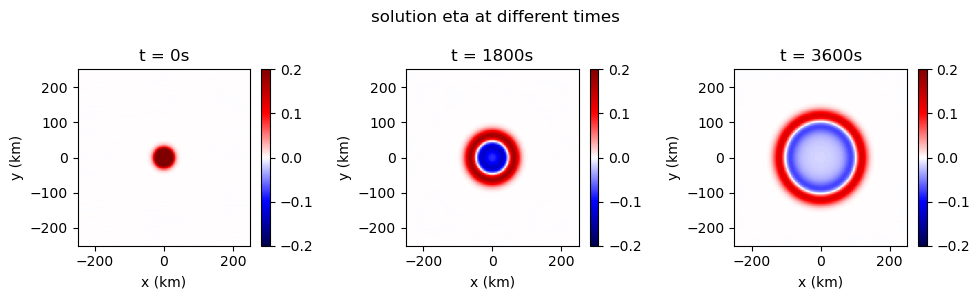

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import  fftshift,fft2, ifft2, ifftshift

# Constants
L=500000
h = 100
g = 9.81
a_x = 20e3
a_y = 20e3
m_val = 2

# Domain
x_vals = np.linspace(-L/2, L/2, 251)
y_vals = np.linspace(-L/2, L/2, 251)
X_vals, Y_vals = np.meshgrid(x_vals, y_vals)

# Initial condition
f_vals = np.exp(-(X_vals / a_x) ** m_val) * np.exp(-(Y_vals / a_y) ** m_val)


k_vals = 2 * np.pi * fftshift(np.fft.fftfreq(len(x_vals), x_vals[1] - x_vals[0]))
l_vals = 2 * np.pi * fftshift(np.fft.fftfreq(len(y_vals), y_vals[1] - y_vals[0]))
K_vals, L_vals = np.meshgrid(k_vals, l_vals)
omega_vals = np.sqrt(g * h * (K_vals ** 2 + L_vals ** 2))
f_vals = fftshift(fft2(f_vals))

def eta_solution(t_val):
    # Compute the solution in the frequency domain at time t_val
    Eta_kl_vals = f_vals * np.cos(omega_vals * t_val)

    # Compute the inverse 2D FFT to obtain the solution in the spatial domain
    return np.real(ifft2(ifftshift(Eta_kl_vals)))


# Plot
fig = plt.figure(figsize=(10, 3))


time_vals = [0, 1800, 3600]
for i, t_val in enumerate(time_vals):
    eta_vals = eta_solution(t_val)
    ax_vals = fig.add_subplot(1, 3, i + 1)
    cb_vals = ax_vals.pcolormesh(X_vals / 1e3, Y_vals / 1e3, eta_vals, cmap='seismic',vmin=-0.2, vmax=0.2)
    ax_vals.set_title(f't = {t_val}s')
    ax_vals.set_xlabel('x (km)')
    ax_vals.set_ylabel('y (km)')
    cbar=fig.colorbar(cb_vals, ax=ax_vals)

plt.suptitle('solution eta at different times')
plt.tight_layout()
plt.show()


45.15236409857309


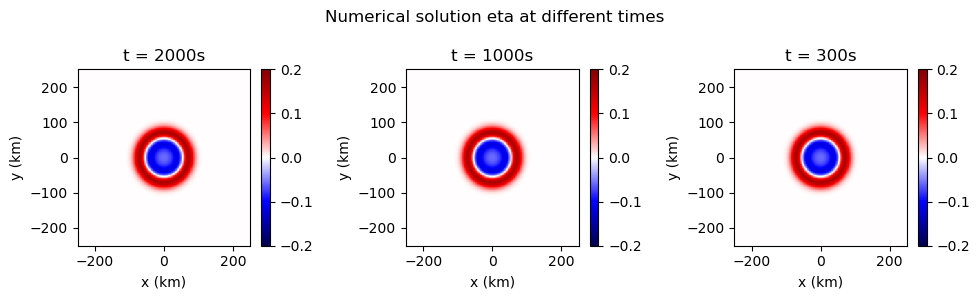

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
L = 500000
H = 100
g = 9.81
a_x = 20e3
a_y = 20e3
m_val = 2
dx = dy = 2e3
c = np.sqrt(g * H)
dt = dx / (c*np.sqrt(2 ))
#dt=100
print(dt)
Nx=int(L / dx)
Ny=int(L / dy)

time_steps = [2000, 1000, 300]

# Domain
x_vals = np.linspace(-L / 2, L / 2, Nx+1)
y_vals = np.linspace(-L / 2, L / 2, Ny+1)
X_vals, Y_vals = np.meshgrid(x_vals, y_vals)

# Initial condition
eta = np.exp(-(X_vals / a_x) ** m_val) * np.exp(-(Y_vals / a_y) ** m_val)

# Initialize grid
eta_new = np.zeros_like(eta)
eta_old = eta.copy()

def leapfrog_update(eta, eta_old):
    eta_new[1:-1, 1:-1] = 2 * eta[1:-1, 1:-1] - eta_old[1:-1, 1:-1] + \
                           c**2 * dt**2 * ((eta[:-2, 1:-1] - 2 * eta[1:-1, 1:-1] + eta[2:, 1:-1])/ dx**2 + \
                                           (eta[1:-1, :-2] - 2 * eta[1:-1, 1:-1] + eta[1:-1, 2:])/ dy**2)

    return eta_new, eta

# Plot
fig = plt.figure(figsize=(10, 3))

t_val = 0
for i, t_end in enumerate(time_steps):
    while t_val < t_end:
        eta_new, eta_old = leapfrog_update(eta, eta_old)
        eta_old = eta.copy()
        eta = eta_new.copy()
        t_val += dt

    ax = fig.add_subplot(1, 3, i + 1)
    cb = ax.pcolormesh(X_vals / 1e3, Y_vals / 1e3, eta, cmap='seismic', vmin=-0.2, vmax=0.2)
    ax.set_title(f't = {t_end}s')
    ax.set_xlabel('x (km)')
    ax.set_ylabel('y (km)')
    cbar = fig.colorbar(cb, ax=ax)

plt.suptitle('Numerical solution eta at different times')
plt.tight_layout()
plt.show()


In [5]:
# Compute L2 norm of error
errors
error = np.sqrt(np.sum((a)**2))
errors.append(error)

NameError: name 'errors' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define grid parameters
L = 500000  # domain size in meters
dx = dy = 2000  # grid spacing in meters
Nx = Ny = int(L/dx) + 1  # number of grid points in each direction

# Compute wave speed
g = 9.81  # acceleration due to gravity in m/s^2
H = 100  # water depth in meters
c = np.sqrt(g*H)
dt = (dx/(c*np.sqrt(2)))
cfl_x=(c*dt)/dx
cfl_y=(c*dt)/dy
T = 3600
Nt = int(T / dt) 
# Define wave parameters
ax = ay = 20000  # wavelength in meters
m = 2


# Initialize grid with initial condition
x = np.linspace(-L/2, L/2, Nx)
y = np.linspace(-L/2, L/2, Ny)
xx, yy = np.meshgrid(x, y)
phi = np.exp(-(xx/ax)**m) * np.exp(-(yy/ay)**m)
phi_old = phi.copy()

# Plot numerical solutions at specified times
times = [0, 1800, 3600]
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
for i, t in enumerate(times):
    # Implement leapfrog method for specified time
    for n in range(int(t/dt)):
        # Compute second-order spatial derivatives using central differences
        x_phi = (np.roll(phi,1, axis=0) - 2*phi + np.roll(phi, -1, axis=0)) 
        y_phi = (np.roll(phi, 1, axis=1) - 2*phi + np.roll(phi, -1, axis=1))

        # Compute new time step using leapfrog method
        phi_new = 2*phi - phi_old + (cfl_x**2*(x_phi) + cfl_y**2*(y_phi))

        # Update old time steps
        phi_old = phi.copy()
        phi = phi_new.copy()
        
    # Plot numerical solution at specified time
    cb_vals = axs[i].pcolormesh(x/1000, y/1000, phi, cmap='coolwarm')
    axs[i].set_aspect('equal')
    axs[i].set_title(f'Numerical solution at t = {t} s')
    axs[i].set_xlabel('x (km)')
    axs[i].set_ylabel('y (km)')
    #cbar = plt.colorbar(pcm, ax=axs[i])
    #cbar.set_label('Surface elevation (m)')
    cbar=fig.colorbar(cb_vals, ax=axs[i])


plt.suptitle('solution eta at different times')
plt.tight_layout()
plt.show()

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use("Agg")

# Constants
L = 250000  # domain size in meters
H = 100  # depth in meters
g = 9.81  # acceleration due to gravity in m/s^2
ax = 20000  # x-component of the characteristic wavelength in meters
ay = 20000  # y-component of the characteristic wavelength in meters
m = 2  # power in the initial condition
c = np.sqrt(g * H)  # wave speed
dx = dy = 2000  # spatial step size in meters
dt = dx / (c * np.sqrt(2))  # time step size in seconds

# Spatial grid
x_vals = np.arange(-L/2, L/2+dx, dx)
y_vals = np.arange(-L/2, L/2+dy, dy)
X_vals, Y_vals = np.meshgrid(x_vals, y_vals)

# Initial condition
phi = np.exp(-(X_vals / ax) ** m) * np.exp(-(Y_vals / ay) ** m)

# Initialize solution arrays
t_vals = [0, 1800, 3600]
phi_vals = [phi]

# Iterate over time steps
phi_n_minus_1 = phi  # initial condition for phi_{n-1}
for n, t in enumerate(np.arange(dt, max(t_vals)+dt, dt)):
    phi_n = leapfrog_step(phi_vals[-1], phi_n_minus_1)
    phi_n_minus_1 = phi_vals[-1]
    phi_vals.append(phi_n)

    # Save solution at specified times
    if t in t_vals:
        plt.figure()
        plt.pcolormesh(X_vals/1e3, Y_vals/1e3, phi_n, cmap='coolwarm')
        plt.colorbar()
        plt.xlabel('x (km)')
        plt.ylabel('y (km)')
        plt.title(f't = {t} s')
        plt.show()

def leapfrog_step(phi_n, phi_n_minus_1):
    # Compute the Laplacian of phi_n
    phi_xx = (np.roll(phi_n, -1, axis=0) - 2*phi_n + np.roll(phi_n, 1, axis=0)) / dx**2
    phi_yy = (np.roll(phi_n, -1, axis=1) - 2*phi_n + np.roll(phi_n, 1, axis=1)) / dy**2

    # Compute the new value of phi
    phi_n_plus_1 = 2*phi_n - phi_n_minus_1 + (c*dt)**2 * (phi_xx + phi_yy)

    return phi_n_plus_1


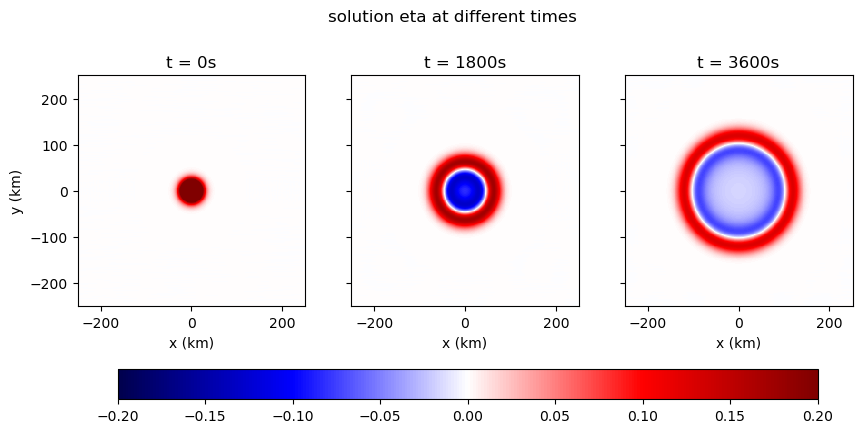

45.15236409857309


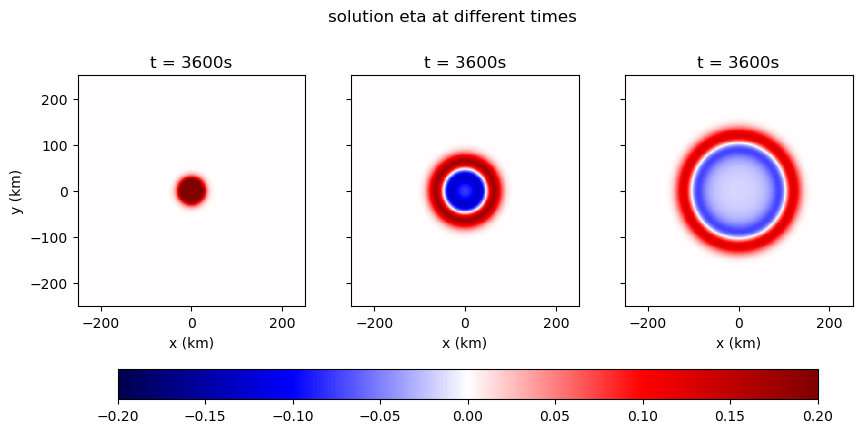

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
L = 500000
H = 100
g = 9.81
a_x = 20e3
a_y = 20e3
T=3600
m_val = 2
dx = dy = 2e3
c = np.sqrt(g * H)
dt = dx / (c*np.sqrt(2 ))
#dt=100
print(dt)
Nx=int(L / dx)
Ny=int(L / dy)
Nt = int(T / dt)

time_steps = [0, 1800, 3600]

# Domain
x_vals = np.linspace(-L / 2, L / 2, Nx+1)
y_vals = np.linspace(-L / 2, L / 2, Ny+1)
X_vals, Y_vals = np.meshgrid(x_vals, y_vals)

# Initial condition
eta = np.exp(-(X_vals / a_x) ** m_val) * np.exp(-(Y_vals / a_y) ** m_val)

# Initialize grid
eta_new = np.zeros_like(eta)
eta_old = eta.copy()

def leapfrog_update(eta, eta_old):
    eta_new[1:-1, 1:-1] = 2 * eta[1:-1, 1:-1] - eta_old[1:-1, 1:-1] + \
                           c**2 * dt**2 * ((eta[:-2, 1:-1] - 2 * eta[1:-1, 1:-1] + eta[2:, 1:-1])/ dx**2 + \
                                           (eta[1:-1, :-2] - 2 * eta[1:-1, 1:-1] + eta[1:-1, 2:])/ dy**2)

    return eta_new, eta

# Plot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3), sharey=True)

t_val = 0
for i, t_end in enumerate(time_steps):
    while t_val < t_end:
        eta_new, eta_old = leapfrog_update(eta, eta_old)
        eta_old = eta.copy()
        eta = eta_new.copy()
        t_val += dt


    cb = ax[i].pcolormesh(X_vals / 1e3, Y_vals / 1e3, eta, cmap='seismic', vmin=-0.2, vmax=0.2)
    ax[i].set_title(f't = {t}s')
    ax[i].set_xlabel('x (km)')
    if i == 0:
        ax[i].set_ylabel('y (km)')

# Create a colorbar with a separate axis and position it below the subplots
cbar_ax = fig.add_axes([0.165, -0.2, 0.7, 0.1])
fig.colorbar(color_plot, cax=cbar_ax, orientation='horizontal')
plt.suptitle('solution eta at different times',y=1.1 )
#plt.tight_layout()
plt.show()

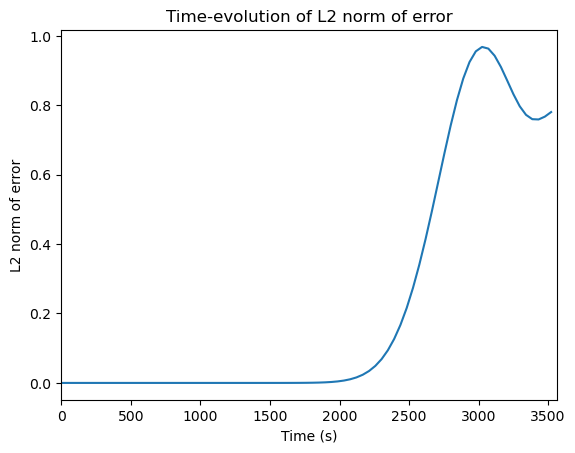

In [66]:
import numpy as np
import matplotlib.pyplot as plt

errorss=[]
for n in range(Nt):

    # Compute L2 norm of error
    error = np.linalg.norm(eta[n]-eta_vals)
    errorss.append(error)



plt.plot(np.arange(Nt)*dt, errorss)
plt.xlabel('Time (s)')
plt.ylabel('L2 norm of error')
plt.title('Time-evolution of L2 norm of error')
plt.xlim(0, Nt*dt)
plt.show()


In [61]:
error = np.linalg.norm(exact_solution - numerical_solution)


NameError: name 'exact_solution' is not defined